In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns

In [41]:
df = pd.read_csv("winequality-red.csv")
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [42]:
df.shape


(1599, 12)

c:\users\91937\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


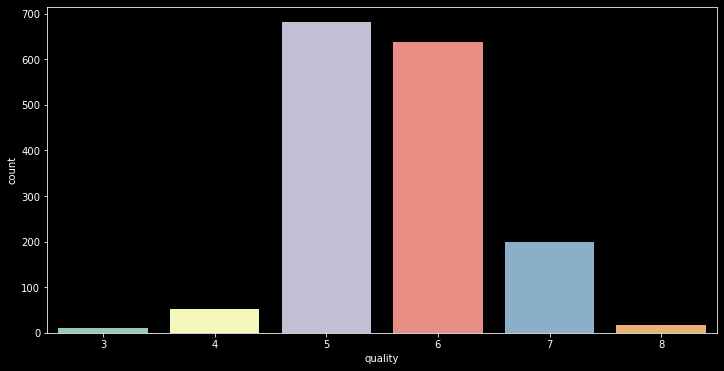

In [43]:
plt.figure(figsize = (12,6))
sns.countplot(df['quality'])
plt.show()

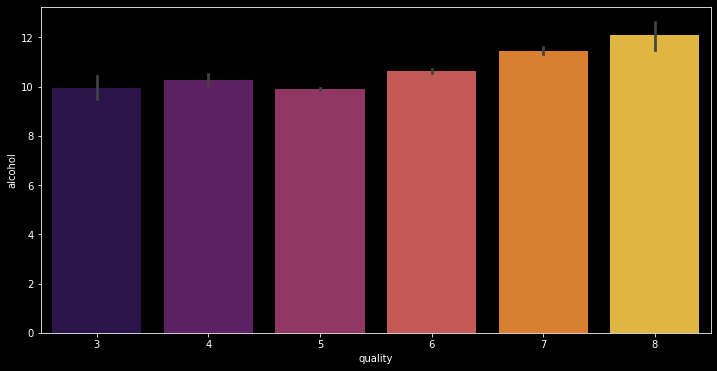

In [44]:
plt.figure(figsize = (12,6))
sns.barplot(x='quality', y = 'alcohol', data = df, palette = 'inferno')
plt.show()

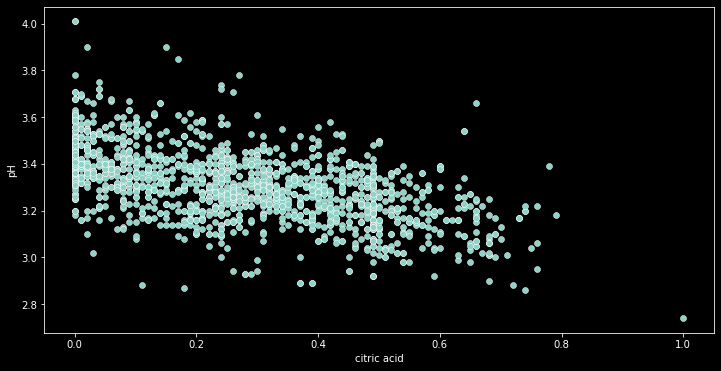

In [45]:
plt.figure(figsize = (12,6))
sns.scatterplot(x='citric acid', y = 'pH', data = df)
plt.show()

<Figure size 864x432 with 0 Axes>

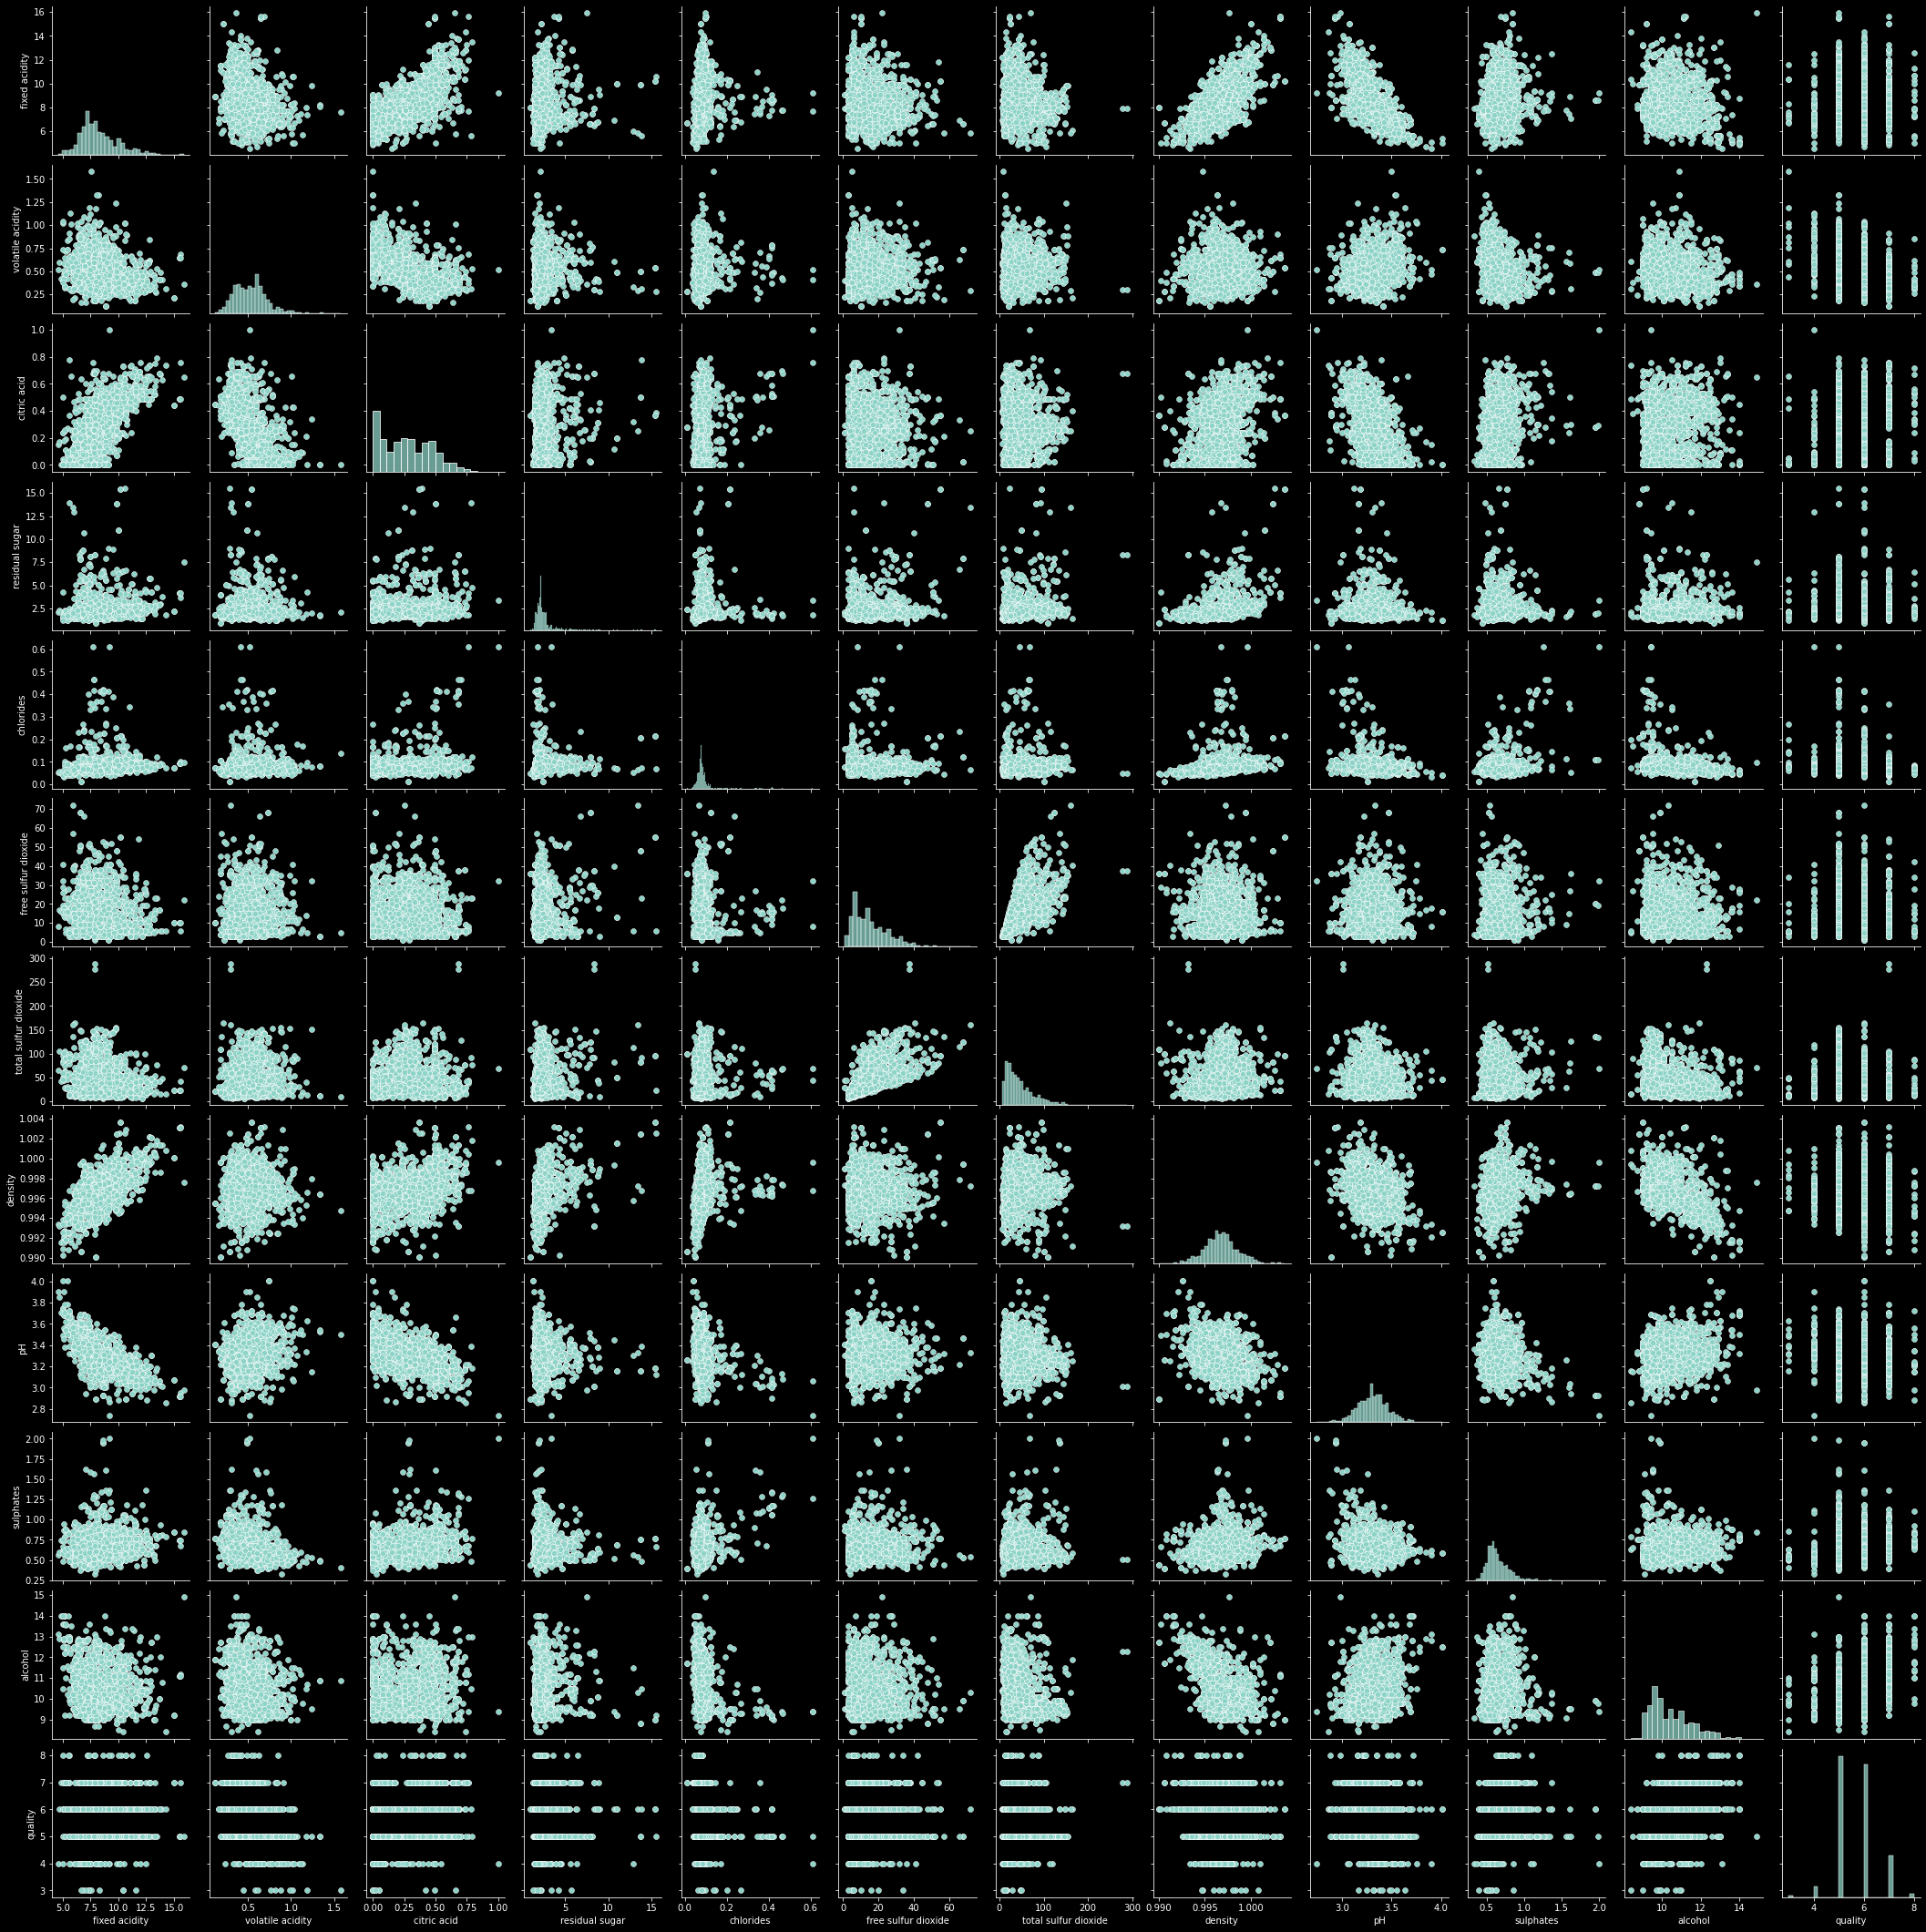

In [46]:
plt.figure(figsize = (12,6))
sns.pairplot(df)
plt.show()

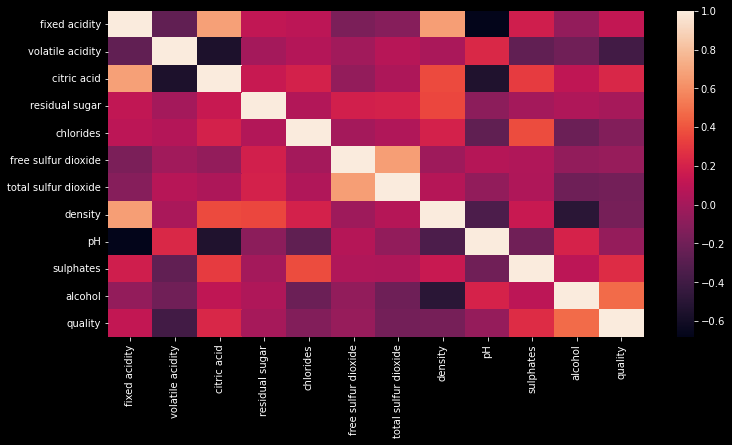

In [47]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr())
plt.show()

In [48]:
x=df.drop(['quality'], axis=1)
y=df['quality']

# Data Preprocessing

In [49]:
## oversampling
import os
from imblearn.over_sampling import SMOTE
os=SMOTE()
x_res, y_res = os.fit_resample(x, y)

In [50]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_res,y_res,test_size=0.2, random_state=0)

In [51]:
from sklearn.preprocessing import StandardScaler

stdscale = StandardScaler().fit(x_train)
x_train_std = stdscale.transform(x_train)
x_test_std = stdscale.transform(x_test)

In [52]:
from sklearn.metrics import accuracy_score

# Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_std, y_train)
predictions = lr.predict(x_test_std)
print("Accuracy :",accuracy_score(y_test, predictions))

Accuracy : 0.5929095354523227


# Decision Tree Classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train_std, y_train)
print("Accuracy :",accuracy_score(y_test, dt.predict(x_test_std)))

Accuracy : 0.7909535452322738


# Random Forest Classifier

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 42)
rf.fit(x_train_std, y_train)
print("Accuracy :",accuracy_score(y_test, rf.predict(x_test_std)))

Accuracy : 0.8704156479217604
